<a href="https://colab.research.google.com/github/nafisenik/DataMinig_pySpark/blob/main/question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 2

### install pySpark

In [1]:
! pip install -q pyspark

In [2]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
! tar xf spark-3.2.1-bin-hadoop3.2.tgz

### Import Libraries

In [3]:
import random
import statistics
import time
import numpy as np
from operator import add
import matplotlib.pyplot as plt
import math
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

### Mont Carlo function (Q2 ---> a)

In [4]:
def MC_pi_estimator(iteration):
  circle_point = 0
  total_point = 0
  p_list =[]
  hit = 0
  start_time = time.time()
  for i in range(iteration):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)   
    if x**2 + y**2 < 1:
      circle_point += 1
    total_point += 1
    pi_num = 4.0 * circle_point / total_point
    p_list.append(pi_num)
  end = time.time()
  t = end - start_time
  return p_list, t, pi_num

### Calculate Mean and Variance

In [5]:
ITERATION = 1000000
pi_list ,time_ex, pi_est = MC_pi_estimator(ITERATION)
pi_mean = statistics.mean(pi_list)
pi_variance = statistics.variance(pi_list)
print(f'Mean of P estimate: {pi_mean}')
print(f'Variance of P estimate: {pi_variance}')
print(f'Time of P estimate: {time_ex}')

Mean of P estimate: 3.138242171983195
Variance of P estimate: 5.5341696626436486e-05
Time of P estimate: 1.9293763637542725


### Mont Carlo with pySpark

In [6]:
def is_inside(p):
  x, y = random.uniform(-1, 1), random.uniform(-1, 1)
  if x**2 + y**2 < 1 :
    inside = True
  else:
    inside = False
  return inside

In [7]:
def MC_pi_spark(iteration):
  spark = SparkSession.builder.appName('Pi').getOrCreate()
  sc = spark.sparkContext
  start_time = time.time()
  hit = sc.parallelize(range(0, iteration), 2) \
      .map(is_inside).reduce(add)
  pi = 4.0 * hit / iteration
  t = time.time() - start_time
  spark.stop()
  return pi, t

### Compare Time and Pi value of two diffrent functions

--------Mont Carlo Pi Estimator Without PySparl--------
Number of Itration: 100
Pi = : 3.12
Time of computation: 0.00021982192993164062 seconds
--------Mont Carlo Pi Estimator with PySpark--------
Number of Itration: 100
Pi = : 3.2
Time of computation: 2.1433451175689697 seconds
--------Mont Carlo Pi Estimator Without PySparl--------
Number of Itration: 1000
Pi = : 3.2
Time of computation: 0.0021991729736328125 seconds
--------Mont Carlo Pi Estimator with PySpark--------
Number of Itration: 1000
Pi = : 3.132
Time of computation: 0.8832366466522217 seconds
--------Mont Carlo Pi Estimator Without PySparl--------
Number of Itration: 10000
Pi = : 3.1296
Time of computation: 0.012678384780883789 seconds
--------Mont Carlo Pi Estimator with PySpark--------
Number of Itration: 10000
Pi = : 3.1572
Time of computation: 0.9083907604217529 seconds
--------Mont Carlo Pi Estimator Without PySparl--------
Number of Itration: 100000
Pi = : 3.13648
Time of computation: 0.11803126335144043 seconds
----

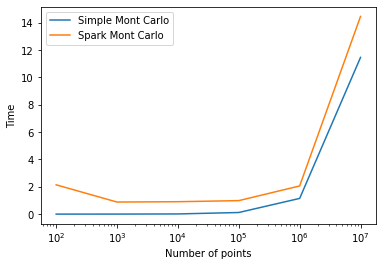

In [8]:
iteration_num = [100, 1000, 10000, 100000, 1000000, 10000000]

time_simple_MC = []
time_spark_MC = []

for i in iteration_num:
    print('--------Mont Carlo Pi Estimator Without PySparl--------')
    pi_l, t, res = MC_pi_estimator(i)
    print(f'Number of Itration: {i}')
    print(f'Pi = : {res}')
    print(f'Time of computation: {t} seconds')
    time_simple_MC.append(t)
    
    print('--------Mont Carlo Pi Estimator with PySpark--------')   
    res, t = MC_pi_spark(i)
    print(f'Number of Itration: {i}')
    print(f'Pi = : {res}')
    print(f'Time of computation: {t} seconds')
    time_spark_MC.append(t)   
plt.figure(1)
plt.plot(iteration_num, time_simple_MC, label="Simple Mont Carlo")
plt.plot(iteration_num, time_spark_MC, label="Spark Mont Carlo")

plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Time")
plt.legend()
plt.show()